<center><h1><b style="color:lightblue;">👩🏻‍💻 NLP Project Twitter</b></h1></center>

In [328]:
# Import libraries
import re
import nltk 
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.svm import SVC
from textblob import TextBlob
from langdetect import detect
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from googletrans import Translator
from textblob import Word , TextBlob
from gensim.models import KeyedVectors
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings as wg
wg.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format',lambda x: '%.2f' % x)

<!DOCTYPE html>
<html>
<body>
        <h2><b style="color:lightblue;">       Content:</b></h2>
        <ul>
            <li><b style="color:lightblue;">1) Dating Data</b></li>
            <li><b style="color:lightblue;">2) Data Preprocessing</b></li>
            <li><b style="color:lightblue;">3) Visualization</b></li>
            <li><b style="color:lightblue;">4) Sentiment Intensity Analyzer</b></li>
            <li><b style="color:lightblue;">5) Machine Learning Model</b></li>
            <li><b style="color:lightblue;">6) Model Hypertuning</b></li>
            <li><b style="color:lightblue;">7) Classification Report</b></li>
            <li><b style="color:lightblue;">8) Testing Model</b></li>
        </ul>
</body>
</html>

<center><h3><b style="color:lightblue;">1) Dating Data</b></h3></center>

In [329]:
# Let's import data frame
data = pd.read_excel('twitter.xlsx')

In [330]:
# Let's look at first 5 row
data.head()

,Tarix,Tweets,Bəyənmə Sayı,Dil
0,2021-05-04,.\nA new 1.8 km long main water pipeli...,33,NaN
1,2021-04-25,' . He was born into a Mountain #Jewish ...,130,NaN
2,2024-03-14,' . He was born into a Mountain #Jewish fami...,130,NaN
3,2021-06-15,Prezident İlham Əliyev və Türkiyə Prezidenti...,45,az
4,2021-05-31,Zəfərin simvolu: növbəti stansiya “8 Noyabr”...,28,NaN


In [331]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tarix         10272 non-null  datetime64[ns]
 1   Tweets        10272 non-null  object        
 2   Bəyənmə Sayı  10272 non-null  int64         
 3   Dil           2802 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 321.1+ KB


In [332]:
# Let's Data shape
data.shape

(10272, 4)

In [333]:
# Let's check null value
data.isnull().sum()

Tarix              0
Tweets             0
Bəyənmə Sayı       0
Dil             7470
dtype: int64

<center><h3><b style="color:lightblue;">2) Data Preprocessing </b></h3></center>

In [335]:
# Let's firstly fill null values
# Function to detect language and fill 'Dil' column if empty
def fill_empty_dil(row):
    if pd.isna(row['Dil']):
        try:
            detected_language = detect(row['Tweets'])
            return detected_language
        except:
            pass
    return row['Dil']

# Apply the function to the DataFrame
data['Dil1'] = data.apply(fill_empty_dil, axis=1)

In [336]:
# Let's select eng language
data = data[data['Dil1'] == 'en']
del data['Dil']
del data['Dil1']

In [337]:
data.to_excel('twitter_last.xlsx', index = False)

In [132]:
# Firstly let's convert case to lower case (for example lower case, may be upper case)
data['Tweets'] = data['Tweets'].str.lower()

In [133]:
# Let's remove dot symbols from text 
data['Tweets'] = data['Tweets'].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]', '', str(x)))

In [134]:
# Now, let's check data which contains number value
data[data['Tweets'].fillna('null').str.contains('\d', regex=True)].iloc[0]['Tweets']

'        a new 18 km long main water pipeline is being laid with steel pipes from the intake chamber near the city of shusha to the warehouse in the city'

In [135]:
# Let's remove digit value from review text
data['Tweets'] = data['Tweets'].str.replace('[\d]', '')

<h8><b style="color:red;">Note: We can keep the number value more in technological product comments. For example, there is a smartphone product and there are different memory options, then numbers can be useful for us. For example: 64 GB product is not good. and so on. </b></h8>

In [136]:
# Let's extract stopwords from our text
# nltk.download('stopwords')
sw = stopwords.words('english')
data['Tweets'] = data['Tweets'].apply(lambda x:  ' '.join(x for x in str(x).split() if x not in sw))

<center><h8><b style="color:#FFFF88"> ❓What is stopwords🤔 </b></h8></center>

<center><h8><b style="color:lightgreen">Stopwords are the glue words in language, like "the," "and," or "in." They help sentences flow smoothly by connecting ideas. In text analysis, they're often removed to focus on meaningful words.</b></h8></center>

In [137]:
# Let's look at stopwords list
print('· Stopwords:')
for index,word in enumerate(sw):
    print(f'{index+1}) {word}')

· Stopwords:
1) i
2) me
3) my
4) myself
5) we
6) our
7) ours
8) ourselves
9) you
10) you're
11) you've
12) you'll
13) you'd
14) your
15) yours
16) yourself
17) yourselves
18) he
19) him
20) his
21) himself
22) she
23) she's
24) her
25) hers
26) herself
27) it
28) it's
29) its
30) itself
31) they
32) them
33) their
34) theirs
35) themselves
36) what
37) which
38) who
39) whom
40) this
41) that
42) that'll
43) these
44) those
45) am
46) is
47) are
48) was
49) were
50) be
51) been
52) being
53) have
54) has
55) had
56) having
57) do
58) does
59) did
60) doing
61) a
62) an
63) the
64) and
65) but
66) if
67) or
68) because
69) as
70) until
71) while
72) of
73) at
74) by
75) for
76) with
77) about
78) against
79) between
80) into
81) through
82) during
83) before
84) after
85) above
86) below
87) to
88) from
89) up
90) down
91) in
92) out
93) on
94) off
95) over
96) under
97) again
98) further
99) then
100) once
101) here
102) there
103) when
104) where
105) why
106) how
107) all
108) any
10

In [138]:
# Let's extract the rare words from review text
word_count = pd.Series(' '.join(data['Tweets']).split()).value_counts()
rare = word_count[word_count <= 1]
data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join(x for x in x.split() if x not in rare))

<center><h8><b style="color:#FFFF88"> ❓What is difference between stopwords and rare words🤔 </b></h8></center>

<center><h8><b style="color:lightgreen">Rare words are infrequently occurring terms that often carry significant meaning or context. They represent specialized terminology or unique concepts within a dataset. Stopwords, on the other hand, are common words that appear frequently in language but contribute little semantic meaning. They are typically filtered out during text analysis to focus on more meaningful content words.</b></h8></center>

In [139]:
# Let's look at rare words' lists
print('· Rare Words:')
for index,word in enumerate(rare.index):
    print(f'{index+1}) {word}')

· Rare Words:
1) ailsin
2) uabitlyrogisg
3) ambassadors
4) etsin
5) suqovuan
6) armengrigoryanc
7) eppresident
8) razminfo
9) timeline
10) kurdishtranscaucasian
11) nassimahdindar
12) digitized
13) anouchtoranian
14) juste
15) armeniansartsakhstrong
16) edoineau
17) festivalshusha
18) catherinedumas
19) fbmejdtpxc
20) endofseason
21) drexlersabine
22) taplaraq
23) trafnda
24) aminvictoriousazerbaijaniheroes
25) roadlan
26) slind
27) sgrovallah
28) iliniz
29) musa
30) qulluqusu
31) saakyan
32) gzl
33) baleytenant
34) davidmaria
35) yolunda
36) sgr
37) artsakharmenia
38) sassoli
39) phdominati
40) senat
41) yaralanm
42) wararmenian
43) ekanlaz
44) gukasyan
45) azerbaijanwhat
46) soit
47) fbmebmxvnsvq
48) azerbaijankhari
49) valerietoranian
50) ideally
51) verirkarabakh
52) azerbaijanmany
53) olunun
54) tomdoss
55) warartsakh
56) gunshot
57) connects
58) badenwurttemberg
59) youdo
60) allmelgibson
61) youthe
62) zoneduring
63) indicators
64) expenses
65) informsreportnewsazazerbaijanbarda

In [140]:
# lemmatize or Stremming
# nltk.download('wordnet')
# Lemmatize
data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
# Stremming
# data['Review'] = data['Review'].apply(lambda x: ' '.join([PorterStemmer().stem(word) for word in x.split()]))

<center><h8><b style="color:#FFFF88"> ❓What is Lemmatize🤔 </b></h8></center>

<center><h8><b style="color:lightgreen">Stemming and lemmatization are both techniques used in natural language processing (NLP) to reduce words to their base or root forms. They are employed to normalize text, which helps in tasks such as text analysis, information retrieval, and machine learning. </b></h8></center>

<center><h3><b style="color:lightblue;">3) Sentiment Intensity Analyzer </b></h3></center>

In [141]:
# Sentiment Analyze
# nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [142]:
# Let's look at pattern then apply to review column
pattern_sentence = 'I love this curtain becouse this curtain is beautiful'
sia.polarity_scores(pattern_sentence)

{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.8442}

In [143]:
# Main parametr is compound
sia.polarity_scores(pattern_sentence)['compound']

0.8442

In [144]:
# Let's create little procedure
def find_sentiment(sentences):
    compound = sia.polarity_scores(str(sentences))['compound']
    if compound > 0:
        print(f"• Result: '{pattern_sentence}' is a positive sentence and compound value is {compound}")
    elif compund == 0:
        print(f"• Result: '{pattern_sentence}' is a neutral sentence and compound value is {compound}")
    else:
        print(f"• Result: '{pattern_sentence}' is a negative sentence and compound value is {compound}")
        
find_sentiment(pattern_sentence)

• Result: 'I love this curtain becouse this curtain is beautiful' is a positive sentence and compound value is 0.8442


In [145]:
# Let's apply to our review column
data['Polarity'] = data['Tweets'].apply(lambda x: sia.polarity_scores(x)['compound'] )

# Function to determine polarity label
def get_polarity_label(x):
    if x > 0:
        return 'Positive'
    elif round(x, 2) == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to create the 'Polarity Label' column
data['Polarity Label'] = data['Polarity'].apply(get_polarity_label)

In [146]:
# Let's look at the distribution
data['Polarity Label'].value_counts()

Negative    3394
Neutral     2292
Positive    2083
Name: Polarity Label, dtype: int64

<center><h3><b style="color:lightblue;">4) Visualization </b></h3></center>

In [147]:
# Let's find word count
tf = data['Tweets'].apply(lambda x: pd.value_counts(x.split())).sum(axis = 0).reset_index()
tf.columns = ['Word','tf']

In [148]:
# Let's sort words by counts
tf.sort_values("tf" , ascending = False , inplace = True)
tf.reset_index(inplace = True , drop = True)

In [149]:
# Let's find more than 500 common words
tf = tf[tf['tf'] > 500]

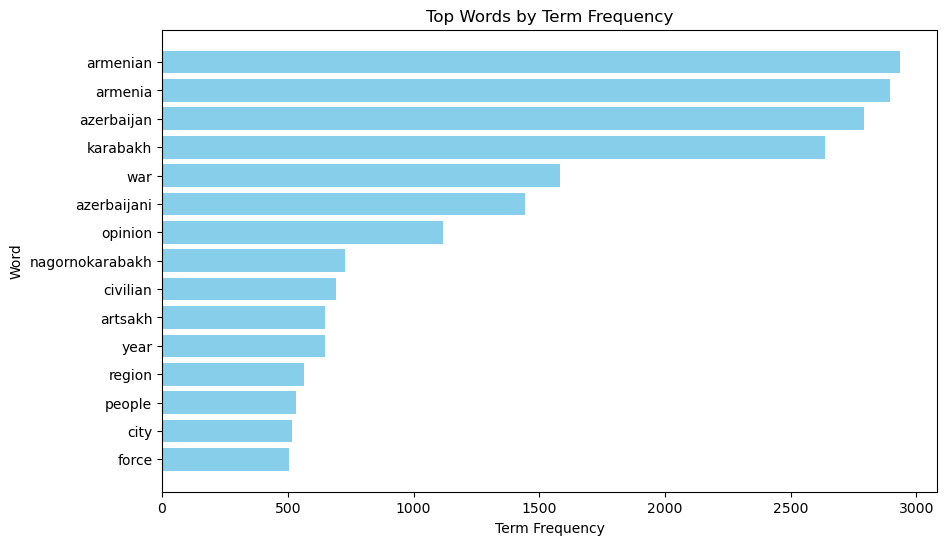

In [155]:
# Visualize words and their numbers
top_words = tf['Word']
tf_values = tf['tf']

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_words)), tf_values, tick_label=top_words, color='skyblue')
plt.xlabel('Term Frequency')
plt.ylabel('Word')
plt.title('Top Words by Term Frequency')
plt.gca().invert_yaxis() 
plt.show()

In [156]:
# Top 10 the most ngrams( 2 words )
from collections import Counter
bigram_counter = Counter()
for review in data['Tweets']:
    words = review.split()
    review_bigrams = zip(words[:-1], words[1:])
    bigram_counter.update(review_bigrams)

for bigram, count in bigram_counter.items():
    print(f"{bigram[0]} {bigram[1]} - {count}")

new km - 2
km long - 2
long main - 2
main water - 2
water pipeline - 2
pipeline laid - 2
laid steel - 2
steel pipe - 2
pipe intake - 2
intake chamber - 2
chamber near - 2
near city - 2
city shusha - 7
shusha warehouse - 2
warehouse city - 2
born mountain - 2
mountain jewish - 2
jewish family - 2
family bakuin - 2
bakuin albert - 2
albert martyred - 2
martyred shusha - 2
aghdam free - 6
free year - 4
year thanks - 4
thanks azerbaijan - 4
azerbaijan diplomacy - 4
diplomacy led - 4
led supreme - 5
supreme commanderinchief - 5
commanderinchief ilham - 5
ilham aliyev - 69
aliyev presidentaz - 7
presidentaz courage - 4
courage army - 4
army aghdam - 2
aghdam liberated - 2
liberated armenian - 13
armenian occupation - 137
occupation karabakhisazerbaijan - 9
armenian armed - 157
armed force - 258
force launched - 5
launched missile - 8
missile attack - 124
attack second - 2
second largest - 21
largest city - 36
city azerbaijan - 73
azerbaijan ganjacity - 8
ganjacity casualty - 2
casualty damag

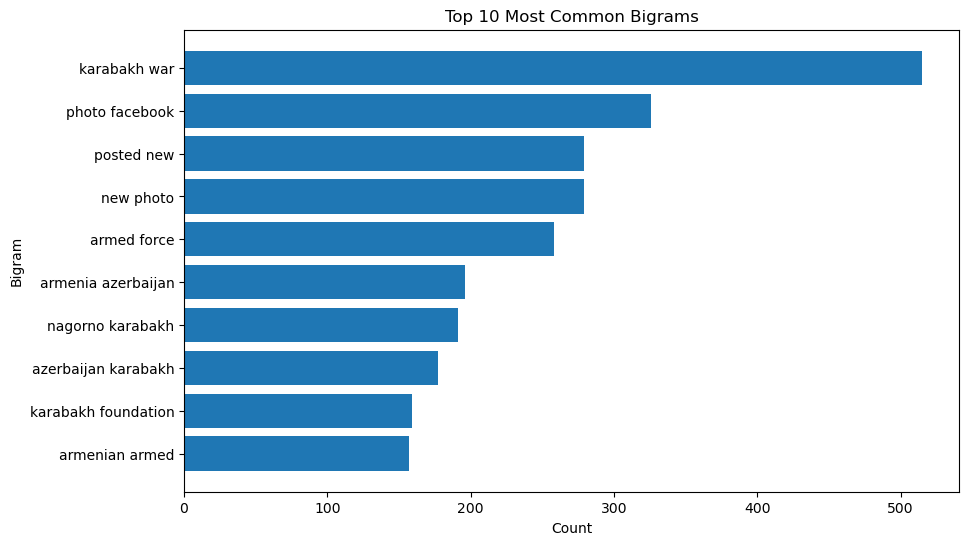

In [157]:
# Visualize bigrams and their numbers
bigram_counter = Counter()
for review in data['Tweets']:
    words = review.split()
    review_bigrams = zip(words[:-1], words[1:])
    bigram_counter.update(review_bigrams)

top_n_bigrams = bigram_counter.most_common(10) 
bigrams, counts = zip(*top_n_bigrams)

plt.figure(figsize=(10, 6))
plt.barh(range(len(bigrams)), counts, tick_label=[f"{bigram[0]} {bigram[1]}" for bigram in bigrams])
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Top 10 Most Common Bigrams')
plt.gca().invert_yaxis()  
plt.show()

· How many maximum words to visualize? 
· Enter the number of words: 50


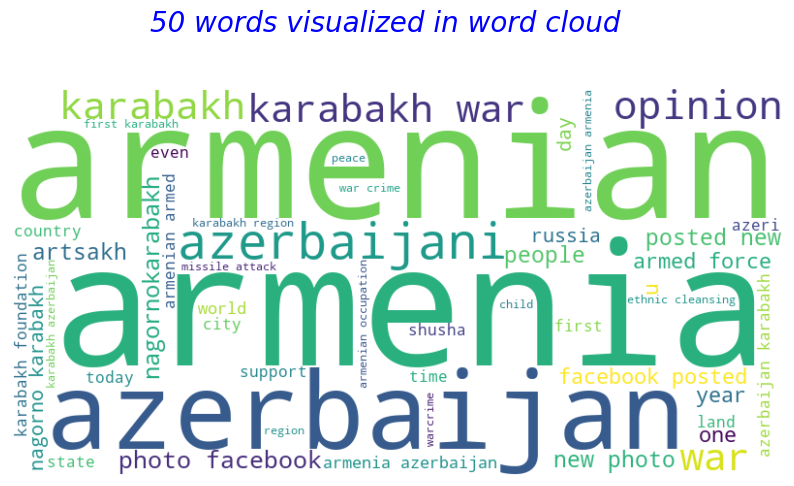

In [158]:
# WordCloud Visualization
word_count = int(input('· How many maximum words to visualize? \n· Enter the number of words: '))
all_feedbacks = ' '.join(data['Tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words = word_count).generate(all_feedbacks)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.suptitle(f"{word_count} words visualized in word cloud", fontsize=20, fontstyle='italic', color='blue', y=0.95)
plt.axis('off')
plt.show()

· How many maximum words to visualize? 
· Enter the number of words: 49


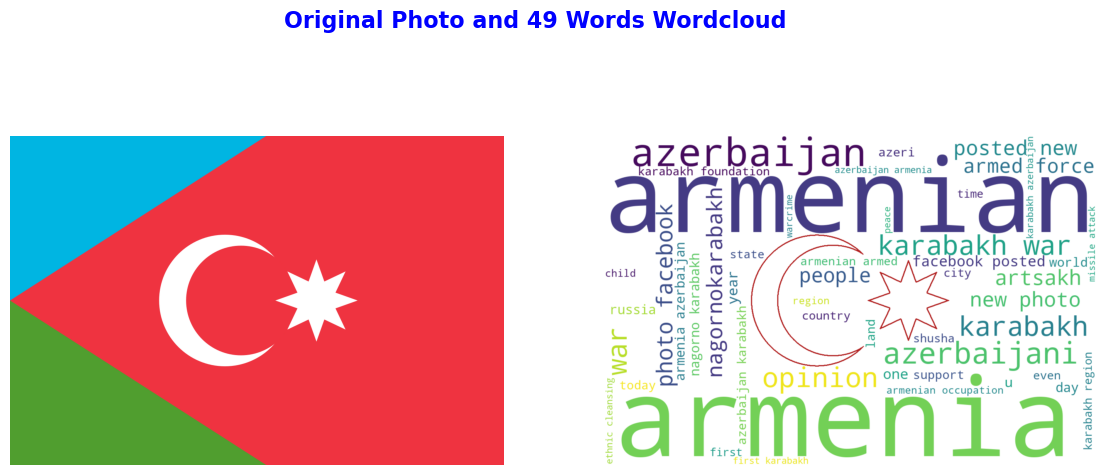

In [159]:
word_count = int(input('· How many maximum words to visualize? \n· Enter the number of words: '))
az_mask = np.array(Image.open('Azerbaijan.png'))
wordcloud = WordCloud(mask=az_mask, background_color='white',max_words = word_count,contour_width= 3,contour_color= "firebrick").generate(all_feedbacks)

plt.figure(figsize=(14, 6))

# Plot the first image (az_mask)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.imshow(az_mask)
plt.axis('off')

# Plot the second image (wordcloud)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.suptitle(f'Original Photo and {word_count} Words Wordcloud', fontsize=16, fontweight='bold' ,color = 'blue')
plt.show()

In [160]:
data['Tweets'] = data['Tweets'].str.replace('azerbaijan', 'azerbaijani', case=False)
data['Tweets'] = data['Tweets'].str.replace('armenia', 'armenian', case=False)

In [161]:
dataframe = data

In [162]:
# Set 'City' to 'Azerbaijan' where 'Tweets' contains 'azerbaijani'
data.loc[data['Tweets'].str.contains('azerbaijani', case=False), 'City'] = 'Azerbaijan'

# Set 'City' to 'Armenia' where 'Tweets' contains 'armenian'
data.loc[data['Tweets'].str.contains('armenian', case=False), 'City'] = 'Armenia'

# Set 'City' to 'Azerbaijan | Armenia' where both 'azerbaijani' and 'armenian' are mentioned
data.loc[data['Tweets'].str.contains('azerbaijani', case=False) & data['Tweets'].str.contains('armenian', case=False), 'City'] = 'Azerbaijan | Armenia'

In [163]:
data['City'].value_counts()

Azerbaijan | Armenia    2797
Armenia                 1795
Azerbaijan              1035
Name: City, dtype: int64

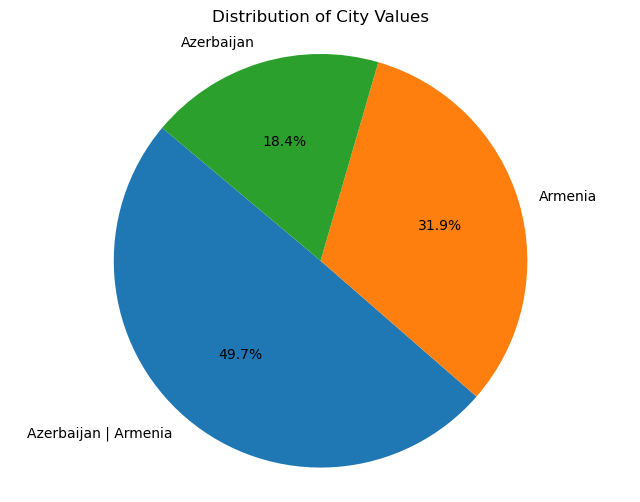

In [164]:
# Count the occurrences of each city
city_counts = data['City'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of City Values')
plt.axis('equal')
plt.show()

In [165]:
# Calculate the mean polarity for each city
data.groupby('City')['Polarity'].mean()

City
Armenia                -0.25
Azerbaijan              0.09
Azerbaijan | Armenia   -0.29
Name: Polarity, dtype: float64

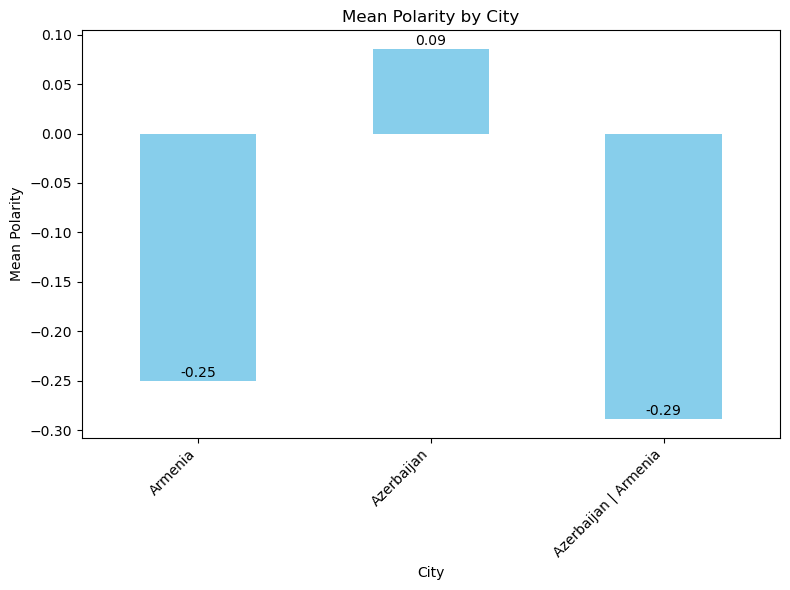

In [166]:
# Calculate the mean polarity for each city
mean_polarity_by_city = data.groupby('City')['Polarity'].mean()

# Plotting a bar plot
ax = mean_polarity_by_city.plot(kind='bar', figsize=(8, 6), color='skyblue')

# Adding data labels
for i, v in enumerate(mean_polarity_by_city):
    ax.text(i, v + 0.0011, f'{v:.2f}', ha='center', va='bottom')

# Adding titles and labels
plt.title('Mean Polarity by City')
plt.xlabel('City')
plt.ylabel('Mean Polarity')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

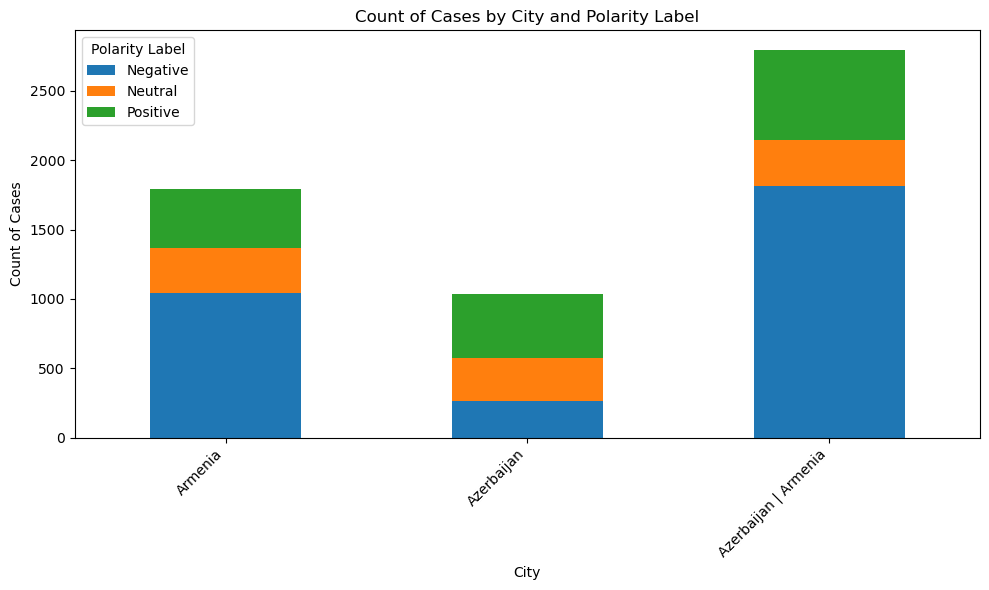

In [167]:
# Group the data by 'City' and 'Polarity Label' and count the number of cases
count_cases = data.groupby(['City', 'Polarity Label']).size().unstack(fill_value=0)

# Plotting the data
ax = count_cases.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding a legend
ax.legend(title='Polarity Label')

# Adding titles and labels
plt.title('Count of Cases by City and Polarity Label')
plt.xlabel('City')
plt.ylabel('Count of Cases')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

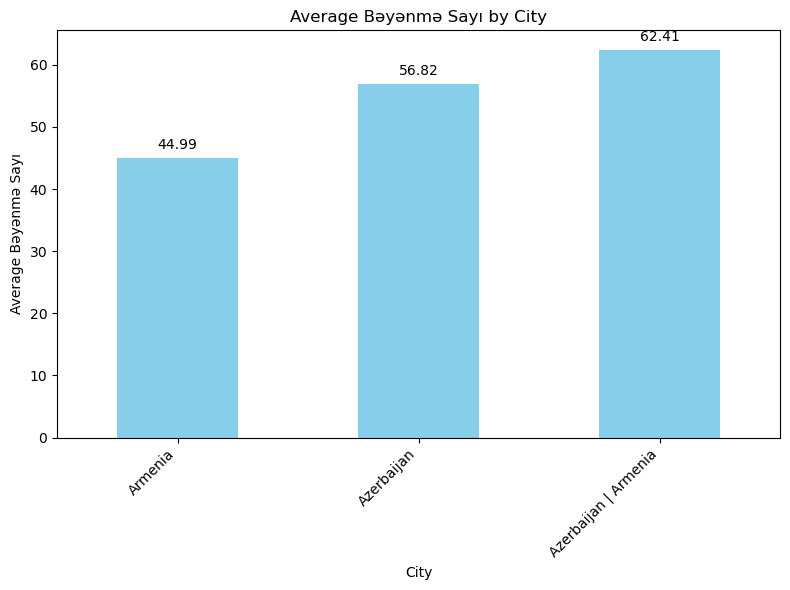

In [168]:
# Calculate the average of 'Bəyənmə Sayı' for each city
average_beyenme_by_city = data.groupby('City')['Bəyənmə Sayı'].mean()

# Plotting a bar plot
ax = average_beyenme_by_city.plot(kind='bar', figsize=(8, 6), color='skyblue')

# Adding data labels
for i, v in enumerate(average_beyenme_by_city):
    ax.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom')

# Adding titles and labels
plt.title('Average Bəyənmə Sayı by City')
plt.xlabel('City')
plt.ylabel('Average Bəyənmə Sayı')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

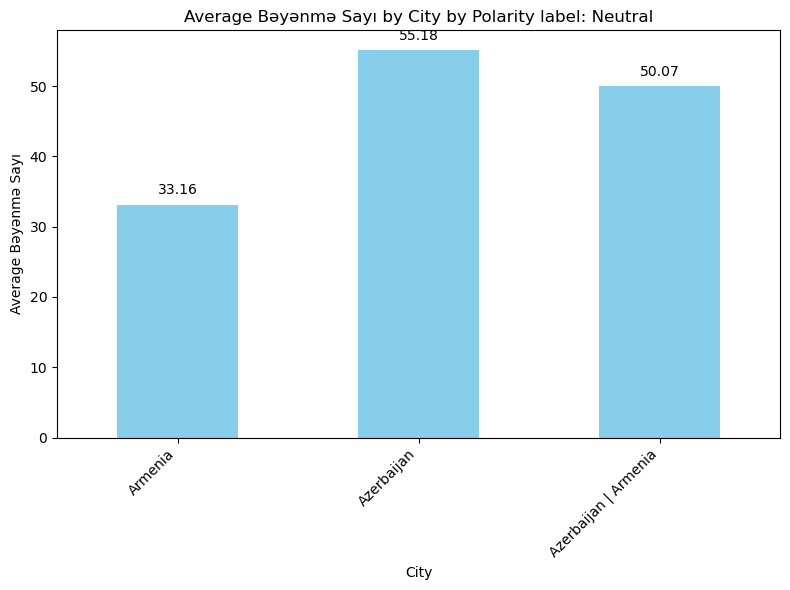

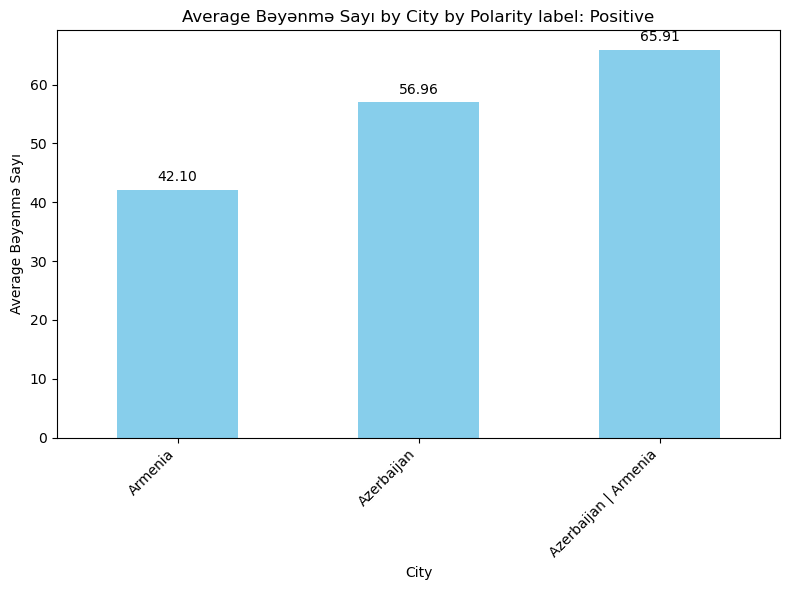

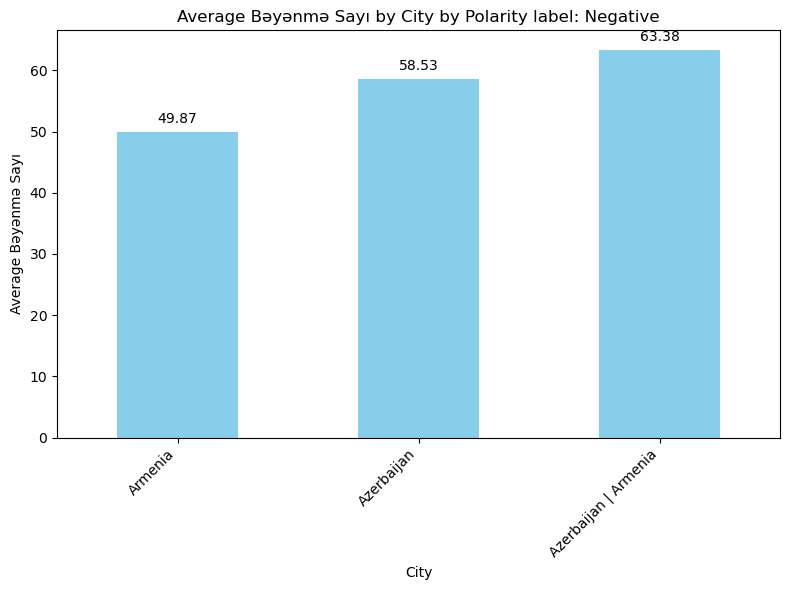

In [169]:
# Calculate the average of 'Bəyənmə Sayı' for each city
for y in data['Polarity Label'].unique():
    data1 = data[data['Polarity Label'] == y]
    average_beyenme_by_city = data1.groupby('City')['Bəyənmə Sayı'].mean()

    # Plotting a bar plot
    ax = average_beyenme_by_city.plot(kind='bar', figsize=(8, 6), color='skyblue')

    # Adding data labels
    for i, v in enumerate(average_beyenme_by_city):
        ax.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom')

    # Adding titles and labels
    plt.title(f'Average Bəyənmə Sayı by City by Polarity label: {y}')
    plt.xlabel('City')
    plt.ylabel('Average Bəyənmə Sayı')
    plt.xticks(rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()

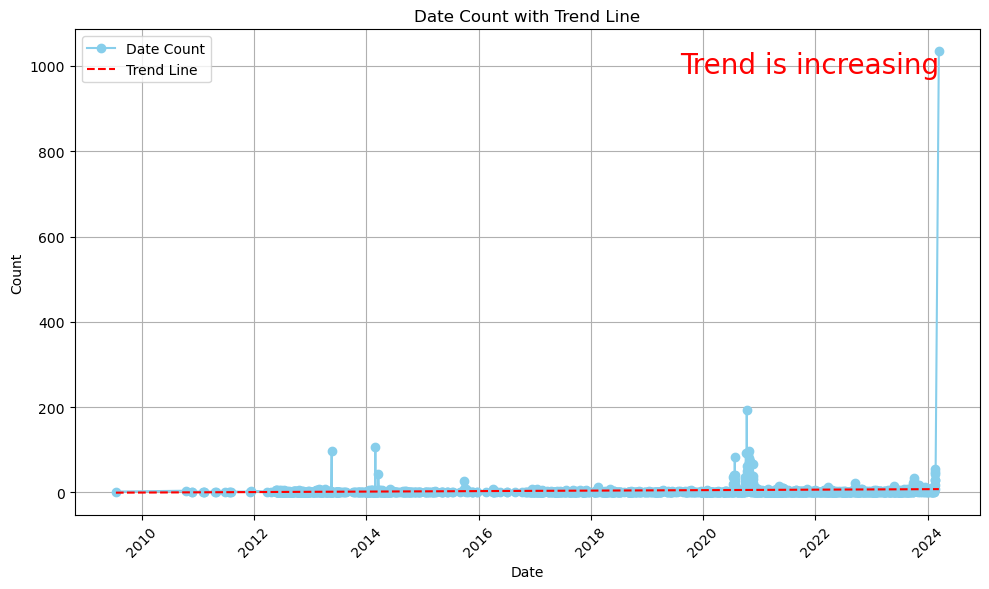

In [170]:
# Convert 'Tarix' column to datetime
data['Tarix'] = pd.to_datetime(data['Tarix'])

# Count the occurrences of each date
date_counts = data['Tarix'].value_counts().sort_index()

# Extract dates and counts
dates = date_counts.index.values.astype(np.int64) // 10**9  # Convert to seconds since epoch
counts = date_counts.values

# Fit linear regression
model = LinearRegression().fit(dates.reshape(-1, 1), counts)
trend_line = model.predict(dates.reshape(-1, 1))

# Check if the trend is increasing
if model.coef_[0] > 0:
    trend_info = 'Trend is increasing'
else:
    trend_info = 'Trend is not increasing'

# Plotting a line chart with trend line
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', color='skyblue', label='Date Count')
plt.plot(date_counts.index, trend_line, color='red', linestyle='--', label='Trend Line')
plt.title('Date Count with Trend Line')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.text(date_counts.index[-1], date_counts.values[-1], trend_info, ha='right', va='top', fontsize = 20,color='red')
plt.tight_layout()
plt.show()

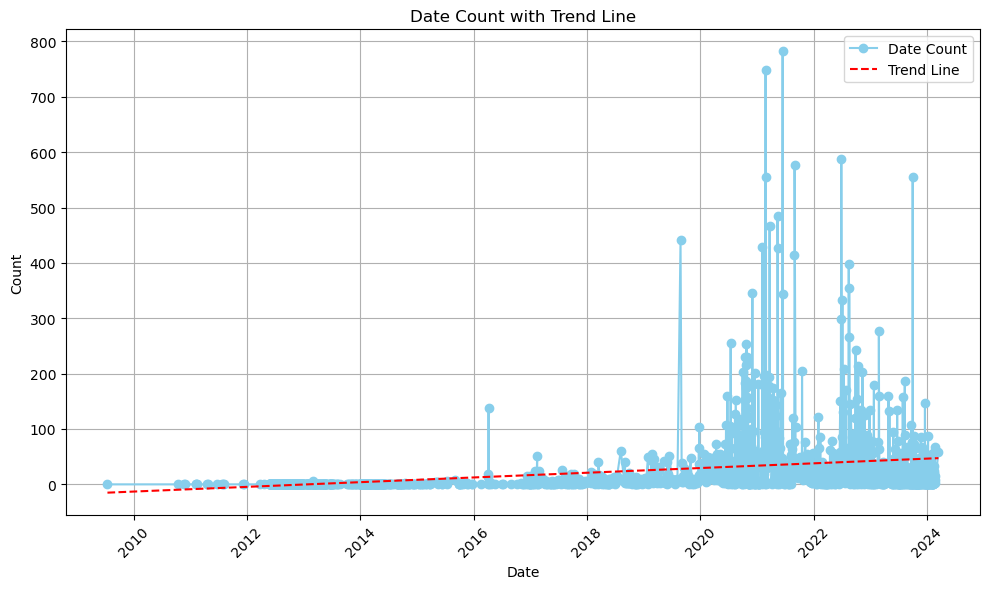

In [171]:
# Convert 'Tarix' column to datetime
data['Tarix'] = pd.to_datetime(data['Tarix'])

# Count the occurrences of each date
date_counts = data['Tarix'].value_counts().sort_index()
date_counts = data.groupby(by = 'Tarix')['Bəyənmə Sayı'].mean()


# Extract dates and counts
dates = date_counts.index.values.astype(np.int64) // 10**9  # Convert to seconds since epoch
counts = date_counts.values

# Fit linear regression
model = LinearRegression().fit(dates.reshape(-1, 1), counts)
trend_line = model.predict(dates.reshape(-1, 1))

# Plotting a line chart with trend line
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', color='skyblue', label='Date Count')
plt.plot(date_counts.index, trend_line, color='red', linestyle='--', label='Trend Line')
plt.title('Date Count with Trend Line')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

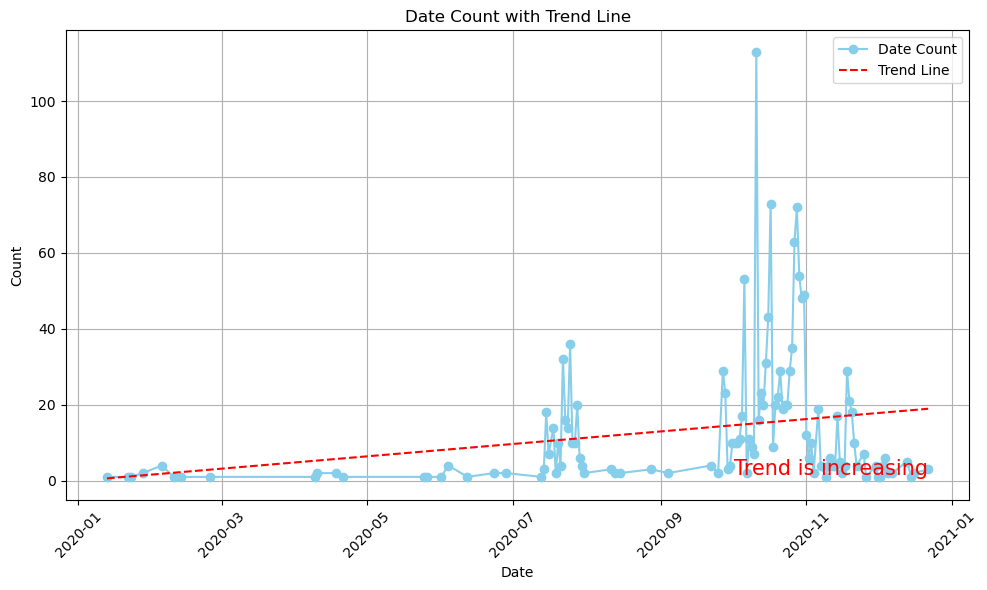

In [172]:
# Convert 'Tarix' column to datetime
data['Tarix'] = pd.to_datetime(data['Tarix'])
data1 = data1[data1['Tarix'].dt.year == 2020]

# Count the occurrences of each date
date_counts = data1['Tarix'].value_counts().sort_index()

# Extract dates and counts
dates = date_counts.index.values.astype(np.int64) // 10**9  # Convert to seconds since epoch
counts = date_counts.values

# Fit linear regression
model = LinearRegression().fit(dates.reshape(-1, 1), counts)
trend_line = model.predict(dates.reshape(-1, 1))

# Check if the trend is increasing
if model.coef_[0] > 0:
    trend_info = 'Trend is increasing'
else:
    trend_info = 'Trend is not increasing'

# Plotting a line chart with trend line
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', color='skyblue', label='Date Count')
plt.plot(date_counts.index, trend_line, color='red', linestyle='--', label='Trend Line')
plt.title('Date Count with Trend Line')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.text(date_counts.index[-1], date_counts.values[-1], trend_info, ha='right', va='center', fontsize = 15,color='red')
plt.tight_layout()
plt.show()

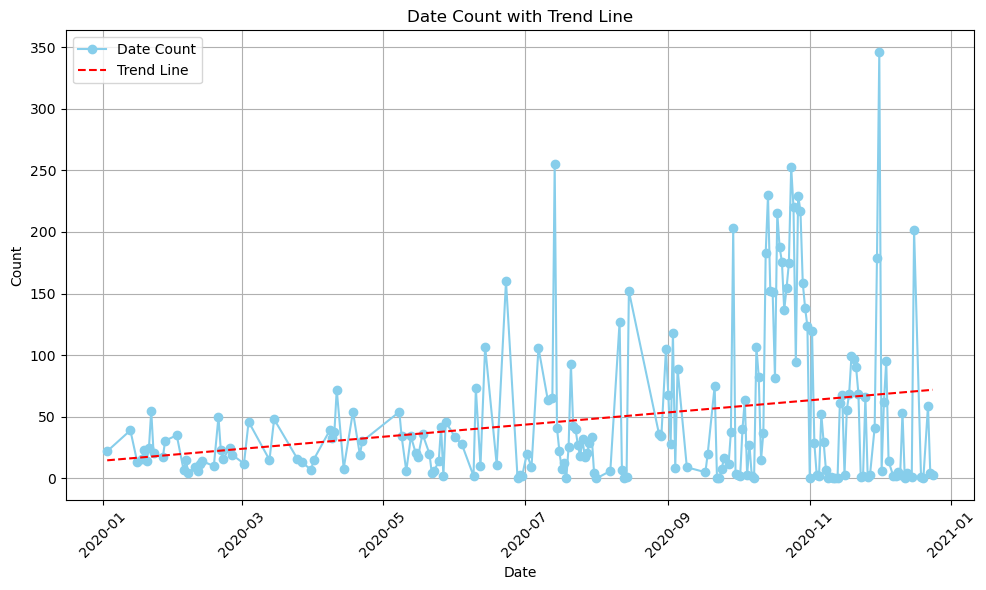

In [173]:
# Convert 'Tarix' column to datetime
data['Tarix'] = pd.to_datetime(data['Tarix'])
data1 = data[data['Tarix'].dt.year == 2020]

# Count the occurrences of each date
date_counts = data1.groupby(by = 'Tarix')['Bəyənmə Sayı'].mean()


# Extract dates and counts
dates = date_counts.index.values.astype(np.int64) // 10**9  # Convert to seconds since epoch
counts = date_counts.values

# Fit linear regression
model = LinearRegression().fit(dates.reshape(-1, 1), counts)
trend_line = model.predict(dates.reshape(-1, 1))

# Plotting a line chart with trend line
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', color='skyblue', label='Date Count')
plt.plot(date_counts.index, trend_line, color='red', linestyle='--', label='Trend Line')
plt.title('Date Count with Trend Line')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

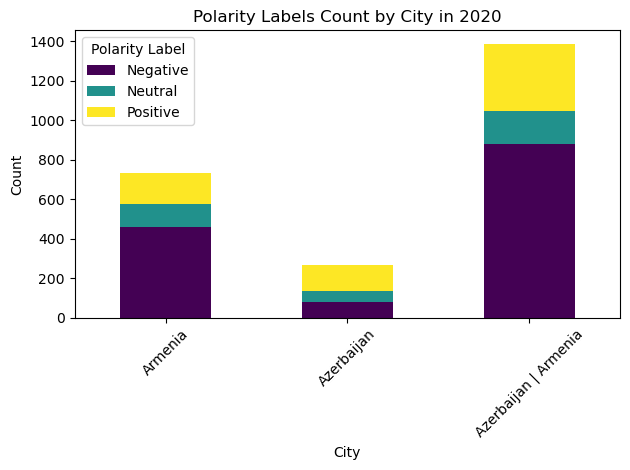

In [174]:
# Filter the DataFrame to include only the data from the year 2020
data_2020 = data[data['Tarix'].dt.year == 2020]

# Group the DataFrame by the 'City' column and calculate counts of polarity labels
grouped = data_2020.groupby('City')['Polarity Label'].value_counts().unstack(fill_value=0)

# Plotting a stacked bar chart
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Polarity Labels Count by City in 2020')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Polarity Label')
plt.tight_layout()
plt.show()

<Figure size 2500x2000 with 0 Axes>

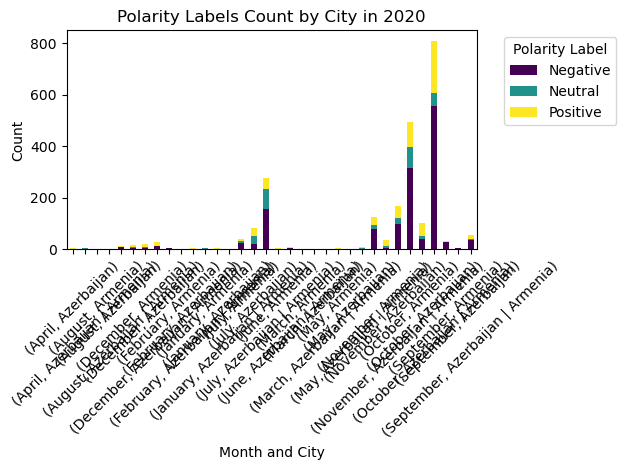

In [179]:
# Convert 'Tarix' column to datetime
data['Tarix'] = pd.to_datetime(data['Tarix'])

# Filter the DataFrame to include only the data from the year 2020
data_2020 = data[data['Tarix'].dt.year == 2020]

# Group the DataFrame by the 'City' column and calculate counts of polarity labels
grouped = data_2020.groupby([data_2020['Tarix'].dt.strftime('%B'), 'City'])['Polarity Label'].value_counts().unstack(fill_value=0)

# Plotting a stacked bar chart
plt.figure(figsize=(25, 20))
grouped.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Polarity Labels Count by City in 2020')
plt.xlabel('Month and City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Polarity Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#!!! If the graphic is not visible, run the following code and you will be able to zoom
# %matplotlib qt

<center><h3><b style="color:lightblue;">5) Machine Learning Model </b></h3></center>

In [180]:
# Let's do label encoder for Polarity Label
data['Polarity Label'] = LabelEncoder().fit_transform(data['Polarity Label'])

In [184]:
# Let's define X and y
X = data['Tweets']
y = data['Polarity Label']

<center><h8><b style="color:#FFFF88"> ❓What is Vectorizer🤔 </b></h8></center>

<center><h8><b style="color:lightgreen">A vectorizer in natural language processing (NLP) converts textual data into numerical vectors, facilitating machine learning algorithms' processing of text. Common types include CountVectorizer, TF-IDF Vectorizer, Word Embeddings, and HashingVectorizer, each with unique characteristics and applications.</b></h8></center>

In [185]:
# Word Count Vectorizer
corpus = ['This is a dog', 'This is a cat']

vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()
print(feature_names)

X_c.toarray()

['cat' 'dog' 'is' 'this']


array([[0, 1, 1, 1],
       [1, 0, 1, 1]], dtype=int64)

In [186]:
# Ngrams count vectorizer
corpus = ['This is a dog', 'This is a cat']

vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (2,3))
X_c = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()
print(feature_names)

X_c.toarray()

['is cat' 'is dog' 'this is' 'this is cat' 'this is dog']


array([[0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0]], dtype=int64)

In [211]:
# Let's apply to review column
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

In [188]:
# Let's look at array
X_count.toarray()[4:7]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [189]:
# TF-IDF --> Word
tfidfVectorizer = TfidfVectorizer()
x_tfidfWord = tfidfVectorizer.fit_transform(X)

In [190]:
# TF-IDF --> Ngrams
tfidfVectorizer = TfidfVectorizer(ngram_range = (2,3))
x_tfidfngram = tfidfVectorizer.fit_transform(X)

In [191]:
# Let's look at array
x_tfidfWord.toarray()[4:5]

array([[0., 0., 0., ..., 0., 0., 0.]])

<center><h3><b style="color:#000000"> 1) Logistic Regression </b></h3></center>

In [236]:
# Let's create model
log_model = LogisticRegression().fit(x_tfidfWord,y)

In [237]:
# Let's find accuracy of model
accuracy = cross_val_score(log_model,x_tfidfWord,y,scoring = "accuracy", cv = 5).mean()
print('Accuracy: ', accuracy)

Accuracy:  0.7672850571112001


In [238]:
# F1-score
f1 = cross_val_score(log_model, x_tfidfWord, y, scoring="f1_macro", cv=5).mean()
print('F1-score: ',f1)

F1-score: 0.7488011929829675


In [239]:
# Let's create model
log_model = LogisticRegression().fit(X_count,y)

In [240]:
# Let's find accuracy of model
accuracy = cross_val_score(log_model,X_count,y,scoring = "accuracy", cv = 5).mean()
print('Accuracy: ', accuracy)

Accuracy:  0.7855607240024497


In [260]:
# F1-score
f1 = cross_val_score(log_model, X_count, y, scoring="f1_macro", cv=5).mean()
print('F1-score: ',f1)

F1-score: 0.7712690309366601


In [194]:
# Test Model with new value
new_review = pd.Series('Everything is good')
# Then we must be vectorize new review for input value
new_review = TfidfVectorizer().fit(X).transform(new_review)
# In the end, we enter review to model and i get output
log_model.predict(new_review)

array([2])

<center><h3><b style="color:#000000"> 2) Random Forest </b></h3></center>

In [241]:
# Let's create random forest mode for this case
rf_model = RandomForestClassifier().fit(x_tfidfWord,y)

In [242]:
# Let's find accuracy of model
accuracy = cross_val_score(rf_model,x_tfidfWord,y,scoring = "accuracy", cv = 5).mean()
print('Accuracy: ', accuracy)

Accuracy:  0.7387102307900762


In [243]:
# F1-score
f1 = cross_val_score(rf_model, x_tfidfWord, y, scoring="f1_macro", cv=5).mean()
print('F1-score: ',f1)

F1-score: 0.703930988794435


In [244]:
# Let's create random forest mode for this case
rf_model = RandomForestClassifier().fit(X_count,y)

In [245]:
# Let's find accuracy of model
accuracy = cross_val_score(rf_model,X_count,y,scoring = "accuracy", cv = 5).mean()
print('Accuracy: ', accuracy)

Accuracy:  0.7381938557083438


In [246]:
# F1-score
f1 = cross_val_score(rf_model, X_count, y, scoring="f1_macro", cv=5).mean()
print('F1-score: ',f1)

F1-score: 0.7066653354804666


<center><h3><b style="color:#000000"> 3)  Support Vector Machine </b></h3></center>

In [247]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the model
svm_model.fit(X_count, y)

SVC(kernel='linear')

In [248]:
# Let's find accuracy of model
accuracy = cross_val_score(svm_model,X_count,y,scoring = "accuracy", cv = 5).mean()
print('Accuracy: ', accuracy)

Accuracy:  0.7850450118962675


In [249]:
# F1-score
f1 = cross_val_score(svm_model, X_count, y, scoring="f1_macro", cv=5).mean()
print('F1-score: ',f1)

F1-score: 0.772609494068428


In [250]:
# Train the model
svm_model.fit(x_tfidfWord, y)

SVC(kernel='linear')

In [251]:
# Let's find accuracy of model
accuracy = cross_val_score(svm_model,x_tfidfWord,y,scoring = "accuracy", cv = 5).mean()
print('Accuracy: ', accuracy)

Accuracy:  0.7614932198319192


In [252]:
# F1-score
f1 = cross_val_score(svm_model, x_tfidfWord, y, scoring="f1_macro", cv=5).mean()
print('F1-score: ',f1)

F1-score: 0.7459358542977486


<center><h3><b style="color:#000000"> 4) Naive Bayes </b></h3></center>

In [253]:
# Create a Naive Bayes model
naive_bayes_model = MultinomialNB()

In [254]:
# Train the model
naive_bayes_model.fit(X_count.toarray(), y)

MultinomialNB()

In [255]:
# Let's find accuracy of model
accuracy = cross_val_score(naive_bayes_model,X_count.toarray(),y,scoring = "accuracy", cv = 5).mean()
print('Accuracy: ', accuracy)

Accuracy:  0.7053627263543555


In [256]:
# F1-score
f1 = cross_val_score(naive_bayes_model, X_count, y, scoring="f1_macro", cv=5).mean()
print('F1-score: ',f1)

F1-score: 0.6869936188212826


In [257]:
# Train the model
naive_bayes_model.fit(x_tfidfWord, y)

MultinomialNB()

In [258]:
# Let's find accuracy of model
accuracy = cross_val_score(naive_bayes_model,x_tfidfWord,y,scoring = "accuracy", cv = 5).mean()
print('Accuracy: ', accuracy)

Accuracy:  0.6609465964907046


In [259]:
# F1-score
f1 = cross_val_score(naive_bayes_model, x_tfidfWord, y, scoring="f1_macro", cv=5).mean()
print('F1-score: ',f1)

F1-score: 0.6108028623352479


<table style='border-collapse: collapse; width: 50%;'>
    <tr>
        <th style='border: 1px solid #000; padding: 8px; text-align: center;'>Models</th>
        <th style='border: 1px solid #000; padding: 8px; text-align: center;'>Accuracy</th>
        <th style='border: 1px solid #000; padding: 8px; text-align: center;'>F1-scores</th>
    </tr>
    <tr>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>Logistic Regression</td>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>0.7855607240024497</td>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>0.7712690309366601</td>
    </tr>
    <tr>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>Random Forest</td>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>0.7439860244753999</td>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>0.7066653354804666</td>
    </tr>
    <tr>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>Support Vector Machine</td>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>0.7850450118962675</td>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>0.772609494068428</td>
    </tr>
    <tr>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>Naive Bayes</td>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>0.7053627263543555</td>
        <td style='border: 1px solid #000; padding: 8px; text-align: center;'>0.6869936188212826</td>
    </tr>
</table>

<center><h3><b style="color:lightgreen"> I think we can get Logistic Regression and Support Vector Machine for hypertuning</b></h3></center>

<center><h3><b style="color:lightblue;">6) Model Hypertuning </b></h3></center>

In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
for i,x in enumerate([X_count,x_tfidfWord]):
    if i == 0:
        print('• For X_count: ')
    else: 
        print('\n\n• For x_tfidfWord: ')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Create a Logistic Regression model
    log_model = LogisticRegression()

    # Define hyperparameter grid for Logistic Regression
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }

    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')  # or 'micro', 'weighted', etc., depending on your needs

    print("\nBest Parameters:", best_params)
    print("Test Accuracy of Best Model:", accuracy)
    print("Test F1 Score (macro) of Best Model:", f1_macro)

• For X_count: 

Best Parameters: {'C': 10, 'penalty': 'l2'}
Test Accuracy of Best Model: 0.9099099099099099
Test F1 Score (macro) of Best Model: 0.9019964507004533


• For x_tfidfWord: 

Best Parameters: {'C': 100, 'penalty': 'l2'}
Test Accuracy of Best Model: 0.9028314028314028
Test F1 Score (macro) of Best Model: 0.8943716402317049


In [283]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

for i,x in enumerate([X_count,x_tfidfWord]):
    if i == 0:
        print('• For X_count: ')
    else: 
        print('\n\n• For x_tfidfWord: ')
        
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Create an SVM model
    svm_model = SVC()

    # Define hyperparameter distribution for Randomized Search
    param_dist = {
        'C': uniform(0.01, 100), 
        'kernel': ['linear', 'rbf', 'poly'],
    }

    # Perform Randomized Search with 5-fold cross-validation
    random_search_svm = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1_macro', n_jobs=-1)
    random_search_svm.fit(X_train, y_train)

    # Get the best parameters and the best model
    best_params_svm = random_search_svm.best_params_
    best_model_svm = random_search_svm.best_estimator_

    # Evaluate the best model on the test set
    y_pred_svm = best_model_svm.predict(X_test)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    f1_macro_svm = f1_score(y_test, y_pred_svm, average='macro')

    print("\nBest Parameters (SVM):", best_params_svm)
    print("Test Accuracy of Best SVM Model:", accuracy_svm)
    print("Test F1 Score (macro) of Best SVM Model:", f1_macro_svm)

• For X_count: 
Best Parameters (SVM): {'C': 46.45121224689047, 'kernel': 'linear'}
Test Accuracy of Best SVM Model: 0.9073359073359073
Test F1 Score (macro) of Best SVM Model: 0.9002262270241514


• For x_tfidfWord: 
Best Parameters (SVM): {'C': 21.407876717426145, 'kernel': 'rbf'}
Test Accuracy of Best SVM Model: 0.8944658944658944
Test F1 Score (macro) of Best SVM Model: 0.884141117383945


<center><h3><b style="color:lightgreen"> I think we can get the best result for hypertuning with Logistic Regression compared to Support Vector Machine </b></h3></center>

<center><h3><b style="color:lightblue;">7) Classification Report </b></h3></center>

In [284]:
# Let's divide dataframe to train and test dataset
train_x , test_x , train_y , test_y =  train_test_split(X ,y , random_state = 42)

In [286]:
# Let's convert input x to vector
tfidfVectorizer = TfidfVectorizer().fit(train_x)
x_train_tfidfWord = tfidfVectorizer.transform(train_x)
x_test_tfidfWord = tfidfVectorizer.transform(test_x)

In [287]:
# Let's convert input x to vector
vectorizer = CountVectorizer().fit(train_x)
x_train_vectorizer = vectorizer.transform(train_x)
x_test_vectorizer = vectorizer.transform(test_x)

In [292]:
# Let's create logistic regression model
log_model = LogisticRegression(C=10, penalty='l2').fit(x_train_tfidfWord,train_y)
# Let's predict X test dataset
y_pred = log_model.predict(x_test_tfidfWord)
# Let's check accuracy score
cross_val_score(log_model,x_test_tfidfWord,test_y,scoring = "accuracy", cv = 5).mean()

0.794120531100098

In [293]:
report_lr = classification_report(test_y, y_pred)
print(report_lr)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       881
           1       0.91      0.88      0.89       558
           2       0.86      0.83      0.84       504

    accuracy                           0.89      1943
   macro avg       0.89      0.88      0.89      1943
weighted avg       0.89      0.89      0.89      1943



In [294]:
# Let's create logistic regression model
log_model = LogisticRegression(C=10, penalty='l2').fit(x_train_vectorizer,train_y)
# Let's predict X test dataset0
y_pred = log_model.predict(x_test_vectorizer)
# Let's check accuracy score
cross_val_score(log_model,x_test_vectorizer,test_y,scoring = "accuracy", cv = 5).mean()

0.793102854265497

In [295]:
report_lr = classification_report(test_y, y_pred)
print(report_lr)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       881
           1       0.90      0.91      0.90       558
           2       0.86      0.84      0.85       504

    accuracy                           0.90      1943
   macro avg       0.89      0.89      0.89      1943
weighted avg       0.90      0.90      0.90      1943



<center><h3><b style="color:lightblue;">8) Testing Model </b></h3></center>

In [319]:
# Let's choose 5 review and test its
review_1 = [data['Tweets'].loc[7]]
review_2 = [data['Tweets'].loc[14]]
review_3 = [data['Tweets'].loc[13]]
review_4 = [data['Tweets'].loc[76]]
review_5 = [data['Tweets'].loc[99]]

In [327]:
data[data['Polarity Label'] == 0]

,Tarix,Tweets,Bəyənmə Sayı,Polarity,Polarity Label,City
7,2020-10-16,armeniann armed force launched missile attack ...,424,-0.85,0,Azerbaijan | Armenia
8,2020-10-16,armeniann armed force launched missile attack ...,424,-0.85,0,Azerbaijan | Armenia
9,2024-02-09,anti terror operation armeniann terror group a...,3,-0.96,0,Armenia
13,2020-10-14,breaking news report today armenian preparing ...,130,-0.77,0,Azerbaijan | Armenia
14,2020-10-14,breaking news report today armenian preparing ...,130,-0.77,0,Azerbaijan | Armenia
...,...,...,...,...,...,...
9632,2020-10-06,zori balayanwhen khachatur entered house seize...,14,-0.36,0,Armenia
9633,2020-10-06,zori balayanwhen khachatur entered house seize...,14,-0.36,0,Armenia
9653,2023-10-05,another top karabakh armeniann criminal arrested,1,-0.69,0,Armenia
9658,2020-10-22,armeniann pull weapon azerbaijanii protester,4,-0.30,0,Azerbaijan | Armenia


In [320]:
# Let's convert to vector
vec_review_1 = TfidfVectorizer().fit(train_x).transform(review_1)
vec_review_2 = TfidfVectorizer().fit(train_x).transform(review_2)
vec_review_3 = TfidfVectorizer().fit(train_x).transform(review_3)
vec_review_4 = TfidfVectorizer().fit(train_x).transform(review_4)
vec_review_5 = TfidfVectorizer().fit(train_x).transform(review_5)

In [321]:
output_review_1 = log_model.predict(vec_review_1)
output_review_2 = log_model.predict(vec_review_2)
output_review_3 = log_model.predict(vec_review_3)
output_review_4 = log_model.predict(vec_review_4)
output_review_5 = log_model.predict(vec_review_5)

In [325]:
# Let's look at results and check up
for i in range(1, 6):  
    prediction = globals()[f'output_review_{i}']
    print(f"Review {i}: {globals()[f'review_{i}']}")
    print(f"Output for review {i}: {prediction}")
    print("Neutral" if prediction[0] == 1 else ('Positive' if prediction[0] == 2 else 'Negative'))
    print('|=====================================================================================|')

Review 1: ['armeniann armed force launched missile attack second largest city azerbaijani ganjacity casualty damage identified']
Output for review 1: [1]
Neutral
|=====================================================================================|
Review 2: ['breaking news report today armenian preparing another missile attack city ganja preventative measure azerbaijani neutralized enemy ballistic missile azerbaijamfa']
Output for review 2: [1]
Neutral
|=====================================================================================|
Review 3: ['breaking news report today armenian preparing another missile attack city ganja preventative measure azerbaijani neutralized enemy ballistic missile azerbaijamfa']
Output for review 3: [1]
Neutral
|=====================================================================================|
Review 4: ['first passenger bus baku arrives liberated fuzuli']
Output for review 4: [1]
Neutral
|==========================================================

<center><h3><b style="color:lightblue;"> The End </b></h3></center>